In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':.5,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Bonds'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]
symbols += ['BND', 'BNDX', 'BNDW', 'BIV', 'AGG']

In [2]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-03-04 to 2019-06-28 - 70'

In [3]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 2) & (stat['21-mean'] > 0.4) & (stat['21-shrp'] > 1.2)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
HYD,62,1.086399,0.404490,2.273809,0.409066
ITM,62,1.104034,0.418411,2.240300,0.438740
VTEB,62,0.969171,0.371504,2.160150,0.333713
MUB,62,0.946291,0.372567,2.092575,0.409122
CMF,62,0.977862,0.389827,2.080908,0.381602
PZA,62,1.126466,0.488853,1.963371,0.506035
TFI,62,0.991287,0.445958,1.849098,0.490727
IGIB,62,1.434994,0.796168,1.593040,0.594408
VCIT,62,1.449214,0.854383,1.501139,0.502684


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['HYD'] -1.3919955036746372 0.6 0.0818131310927649 2.273808634767402
['HYD', 'IGIB'] -1.8444797712571195 -0.011402810199015345 0.10034732144200184 1.933424282500106
['ITM', 'IGIB'] -1.8650416650502681 -0.05168620156433401 0.10331474889550976 1.9166702123814439
['VTEB', 'IGIB'] -1.8743889481522122 -0.09060598596886604 0.09281206356855046 1.8765950257518966
['MUB', 'IGIB'] -1.923292993850446 -0.1808386297949528 0.10035297327188715 1.8428073373273803
['PZA', 'IGIB'] -2.0061204836686977 -0.33795925746974176 0.11004429331188784 1.7782055195108437


['PZA', 'IGIB']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['PZA', 'IGIB'], sr=0)

['PZA', 'IGIB'] -0.22791496415785392 -0.33795925746974176 0.11004429331188784 1.7782055195108437
['PZA', 'IGIB', 'HYD', 'ITM'] -0.35060939336645747 0.35197818070446224 0.09741242592908032 2.0176300420797917
['PZA', 'IGIB', 'HYD', 'VTEB'] -0.3572047888788296 0.35063412785556974 0.09216108326560066 1.9975924487650185
['PZA', 'IGIB', 'HYD', 'MUB'] -0.36855402103998647 0.33551444084274457 0.09593153811726901 1.9806986045527601
['PZA', 'IGIB', 'HYD', 'TFI'] -0.37442464419684585 0.3255635992169827 0.10001175658617152 1.919829334604107
['PZA', 'IGIB', 'HYD', 'VCIT'] -0.5109148945606247 0.18847549985317288 0.1006096055862025 1.8328397174205224
['PZA', 'IGIB', 'HYD', 'VCLT'] -0.5299032064413247 0.14593110751421942 0.12416568604445584 1.7974039450489891
['PZA', 'IGIB', 'HYD', 'LQD'] -0.5311376492629944 0.15621783577862 0.11264451495838564 1.7910257088849215
['PZA', 'IGIB', 'ITM', 'VCLT'] -0.5428255777734281 0.13152502245536213 0.12564939977120979 1.7890269099896579
['PZA', 'IGIB', 'VTEB', 'VCLT'

['PZA', 'IGIB', 'TFI', 'VCLT']

In [7]:
quote.setup_mask(['IGIB', 'MUB'])
quote.find_optimal_ratio(21, 1, .8)

({'IGIB': 0.18, 'MUB': 0.62}, 0.8426, 0.2488)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,62.0,1.194138,0.346881,0.317988,1.054381,1.254704,1.423342,1.834271,2.962023,0.436993
MUB,62.0,0.946291,0.372567,0.256944,0.652203,0.905765,1.224654,1.685346,2.092575,0.409122
PZA,62.0,1.126466,0.488853,0.276890,0.702805,1.081410,1.507222,2.136537,1.963371,0.506035
TFI,62.0,0.991287,0.445958,0.199184,0.617459,0.990884,1.316406,1.838707,1.849098,0.490727
IGIB,62.0,1.434994,0.796168,0.296551,0.766216,1.364701,1.903147,3.412148,1.593040,0.594408
VCLT,62.0,2.345040,1.602457,-0.024010,1.068376,2.135846,3.347598,6.202376,1.359396,0.973805


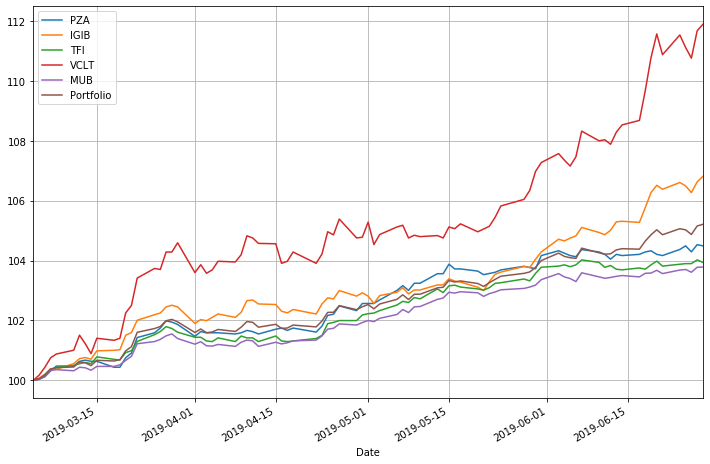

In [8]:
%pylab inline
quote.setup_mask(['PZA', 'IGIB', 'TFI', 'VCLT', 'MUB'])
quote.graph(21, {'VCLT': .1, 'PZA': .1, 'IGIB': 0.18, 'MUB': 0.62})